## `Team members:` 
- **Arwa Essam**
- **Rahma Abdelkader**
- **Yousr Ashraf**
- **Misara Ahmed**
- **Youssef Essam**
- **Abdelrahman yasser**

In [1]:
# importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.stats import norm
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/DELL/Desktop/data.csv") 
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
info= pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"Duplicate",data.duplicated().sum(),True)
info.insert(2,"Unique",data.nunique(),True)
info.insert(3,"Min",data.min(),True)
info.insert(4,"Max",data.max(),True)
info

,IsNull,Duplicate,Unique,Min,Max
id,0,0,569,8670,911320502
diagnosis,0,0,2,B,M
radius_mean,0,0,456,6.981,28.11
texture_mean,0,0,479,9.71,39.28
perimeter_mean,0,0,522,43.79,188.5
area_mean,0,0,539,143.5,2501.0
smoothness_mean,0,0,474,0.05263,0.1634
compactness_mean,0,0,537,0.01938,0.3454
concavity_mean,0,0,537,0.0,0.4268
concave points_mean,0,0,542,0.0,0.2012


In [5]:
null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### since unnamed column is completely null and without any meaning , let's drop it as well as the id as we don't need it in our classification problem

In [6]:
data = data.drop(['Unnamed: 32', 'id'], axis=1) 
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Statsical information for categoral (non-numeric) features
round(data.describe(exclude="number"))

,diagnosis
count,569
unique,2
top,B
freq,357


In [8]:
# Statsical information for  numeric features
round(data.describe(include="number"))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0
max,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0


In [9]:
results = data["diagnosis"].value_counts()
results

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# For better understanding let's replace M and B with malignant and benign
data["diagnosis"] = data["diagnosis"].replace({'M': 'Malignant', 'B': 'Benign'})
data["diagnosis"] 

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: diagnosis, Length: 569, dtype: object

In [11]:
# Reassign target
data.diagnosis.replace(to_replace = dict(Malignant = 1, Benign = 0), inplace = True)

In [12]:
# 2 datasets
Malignant = data[(data['diagnosis'] ==1)]
Benign = data[(data['diagnosis'] == 0)]

In [13]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(Malignant), len(Benign)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'pink', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [14]:
#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'pink'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [15]:
# It seems their is miscalssification in labels as the benign number is more

In [16]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = Malignant[data_select]
    tmp2 = Benign[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFC0CB', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [17]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

### The standard error (SE) of the radius is a measure of the variability or spread of the radius values for a given set of cell nuclei.
### the "Radius SE" in this dataset, it reflects the variability in the size of cell nuclei 

In [18]:
#plot distribution 'se'
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)

In [19]:
#plot distribution 'worst'
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)

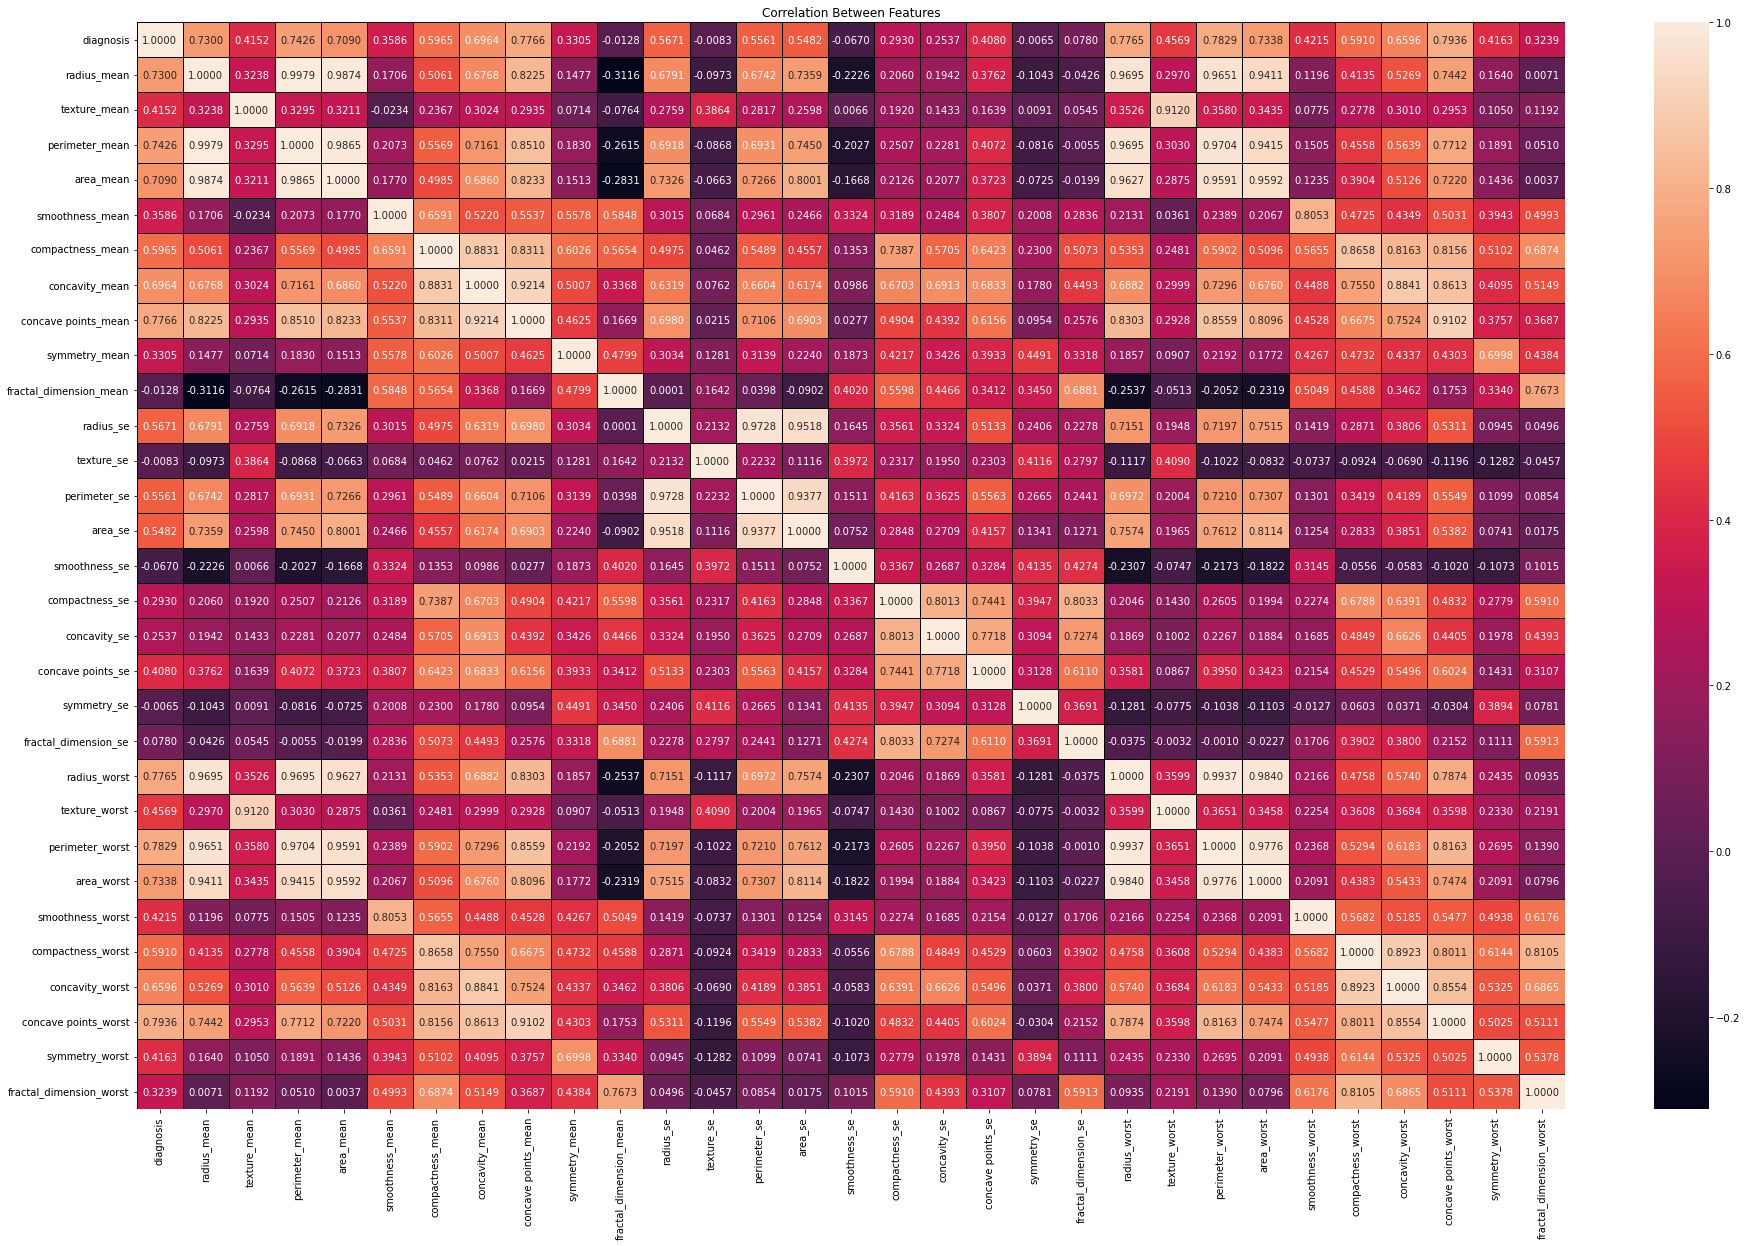

In [20]:
f, ax = plt.subplots(figsize = (32,20))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.title("Correlation Between Features")
plt.show()

Text(0.5, 1.0, 'Correlation Between Features with Corr Thresgold 0.75')

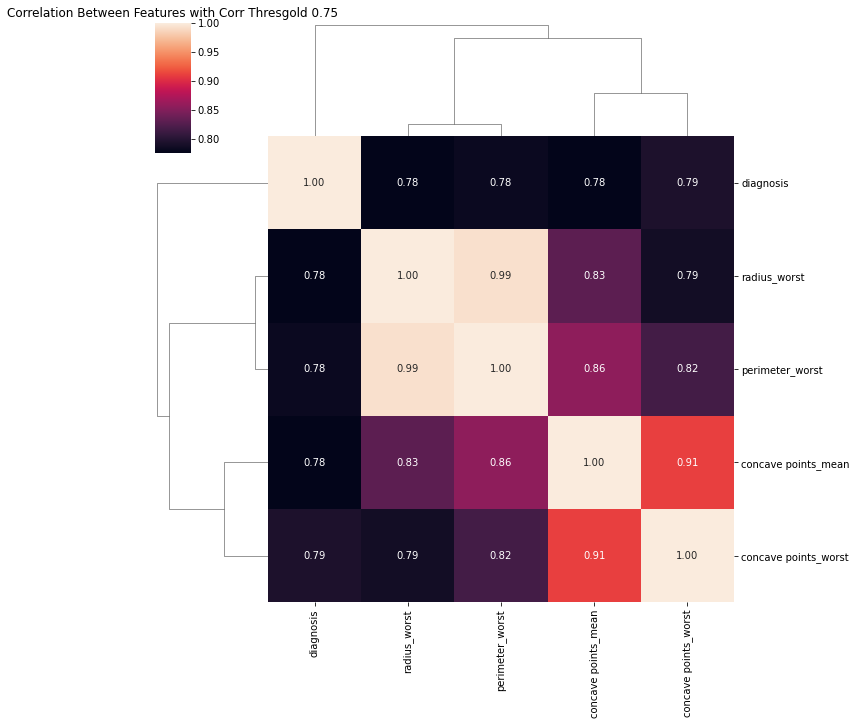

In [21]:
# data with correlation 75%
corr_matrix = data.corr()
threshold = 0.75
filtre = np.abs(corr_matrix["diagnosis"] > threshold)
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Corr Thresgold 0.75")

In [22]:
corr_matrix = data.corr()
matrix_cols = corr_matrix.columns.tolist()
#convert to array
corr_array  = np.array(corr_matrix)
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='blues',
                   colorbar   = dict() ,
                  )
# color : armyrose

layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [23]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = Malignant[feat1],
        y = Malignant[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFC0CB',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = Benign[feat1],
        y = Benign[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )
    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [24]:
# correlated features plotting
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

In [25]:
# uncorrelated features

plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

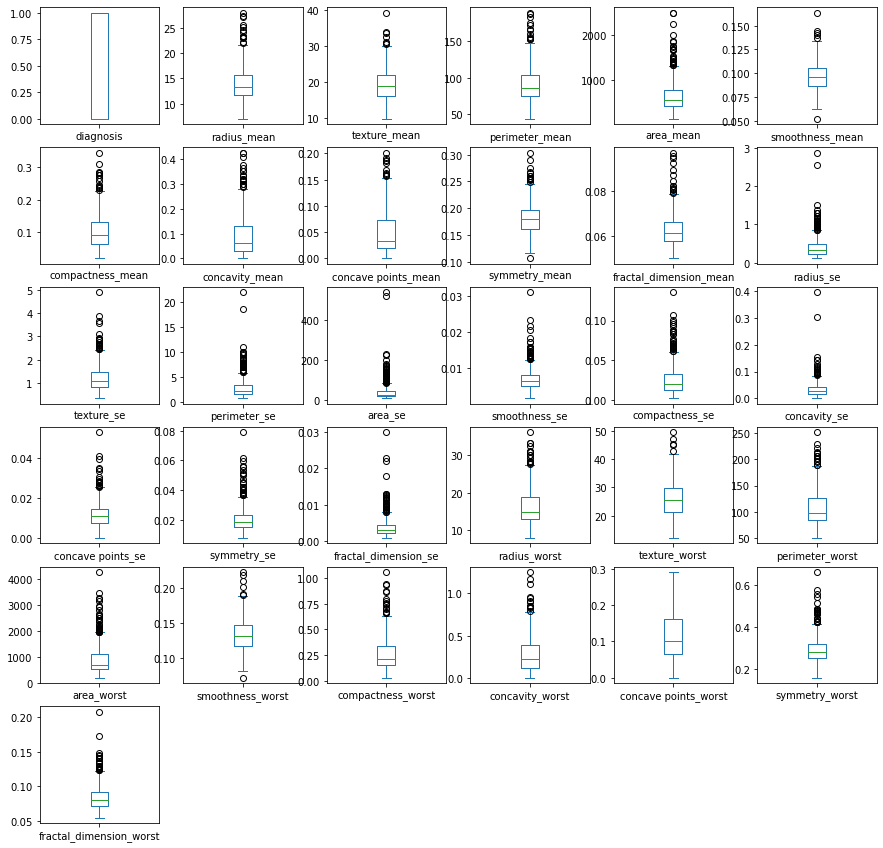

In [26]:
# showing outliers
data.plot(kind = "box" , subplots = True , layout= (6,6), figsize =(15,15) )
plt.show()